# Exploring Dandiset 001354: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation

> **⚠️ CAUTION: This notebook was AI-generated and has not been fully verified. Please exercise caution when interpreting the code or results.**

## Overview

This notebook explores Dandiset 001354, which contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors (PAGERs). The recorded neurons were transfected with an AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were then recorded in response to DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application.

**Dandiset Link:** [https://dandiarchive.org/dandiset/001354/0.250312.0036](https://dandiarchive.org/dandiset/001354/0.250312.0036)

## What will we cover?

In this notebook, we will:

1. Connect to the DANDI archive and load metadata for Dandiset 001354
2. Explore the structure of the assets (NWB files) available in the Dandiset
3. Load an NWB file and examine its structure
4. Visualize intracellular electrophysiological recordings and their responses to stimuli
5. Compare multiple recordings and explore relationships between stimuli and responses
6. Discuss potential future analysis directions

## Required packages

The following packages are required to run this notebook:

In [1]:
# Core data handling and scientific computing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import remfile

# For accessing DANDI archive
from dandi.dandiapi import DandiAPIClient

# For working with NWB files
import pynwb

# Set plotting style
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load the Dandiset using the DANDI API

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}")
print(f"Keywords: {metadata['keywords']}")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036
Description: This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors. Recorded neurons were transfected with an AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were then recorded in response to DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application.

The authors are grateful to the St Jude Children’s Research Hospital Collaborative Research Consortium on GPCRs, the Chan Zuckerberg Biohub–San Francisco, Phil and Penny Knight Initiative for Brain Resilience (KIG-104), Stanford Cancer Institute, Wu Tsai Neurosciences Institute of Stanford University and the NIH (MH135934 to A.Y.T. and I.S., F32CA257159 to N.A.K., NS121106 to I.S.) for funding this work. 

## 2. Explore assets in the Dandiset

In [3]:
# List some assets in the Dandiset
from itertools import islice

assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")


First 5 assets:
- sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb (ID: b2860f39-ba08-4b5f-8e12-c4b51ad6ccba)
- sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb (ID: 8609ffee-a79e-498c-8dfa-da46cffef135)
- sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb (ID: c1a42ce7-eca1-481c-9bed-1fc055ba1aef)
- sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb (ID: a93f7c5b-a804-4165-aec5-c3571f0611f2)
- sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb (ID: 58c534de-2a38-4a5b-986c-2dc4c3067b97)


## 3. Load an NWB file and explore its structure

We'll examine one of the NWB files from the dataset. For this demonstration, we'll select the file `sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb`.

In [4]:
# Define the URL for the NWB file we want to access
url = "https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/"
neurosift_url = f"https://neurosift.app/nwb?url={url}&dandisetId=001354&dandisetVersion=0.250312.0036"

print(f"Loading NWB file from URL: {url}")
print(f"Neurosift URL (for interactive exploration): {neurosift_url}")

# Load the file using remfile and h5py
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

Loading NWB file from URL: https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/
Neurosift URL (for interactive exploration): https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=0.250312.0036


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## 4. Examine file metadata

In [5]:
# Show basic metadata about the file
print(f"NWB file identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")

NWB file identifier: pk2024_07_17_0001
Session description: Intracellular electrophysiology experiment.
Session start time: 2024-07-17 15:08:30-07:00
Lab: _
Institution: _


### Subject information

In [6]:
# Show information about the subject
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Date of birth: {nwb.subject.date_of_birth}")

Subject ID: PK-109
Species: Mus musculus
Sex: F
Date of birth: 2024-04-07 00:00:00-07:00


### Recording metadata

In [7]:
# Show information about the recording setup from lab_meta_data
lab_meta_data = nwb.lab_meta_data
dandi_icephys_metadata = lab_meta_data["DandiIcephysMetadata"]

print(f"Cell ID: {dandi_icephys_metadata.cell_id}")
print(f"Slice ID: {dandi_icephys_metadata.slice_id}")
print(f"Targeted brain layer: {dandi_icephys_metadata.targeted_layer}")

Cell ID: 2024_07_17_0001
Slice ID: 2024_07_17_0001
Targeted brain layer: CA1


## 5. Structure of the NWB file

NWB files for intracellular electrophysiology have multiple important components:

1. **Acquisition**: Contains the responses (CurrentClampSeries)
2. **Stimulus**: Contains the stimulus applied (CurrentClampStimulusSeries)
3. **ICEphys Electrodes**: Information about the recording electrodes
4. **Tables tracking recordings**: Data tables that organize the recordings

In [8]:
# Display structure of acquisition data
acquisition = nwb.acquisition
print("Number of acquisition entries:", len(acquisition))
print("\nFirst few acquisition entries:")
for i, key in enumerate(list(acquisition.keys())[:5]):
    item = acquisition[key]
    print(f"- {key}: {type(item).__name__}, shape {item.data.shape}, unit {item.unit}")

Number of acquisition entries: 624

First few acquisition entries:
- current_clamp-response-01-ch-0: CurrentClampSeries, shape (100000,), unit volts
- current_clamp-response-01-ch-1: CurrentClampSeries, shape (100000,), unit volts
- current_clamp-response-02-ch-0: CurrentClampSeries, shape (100000,), unit volts
- current_clamp-response-02-ch-1: CurrentClampSeries, shape (100000,), unit volts
- current_clamp-response-03-ch-0: CurrentClampSeries, shape (100000,), unit volts


In [9]:
# Display structure of stimulus data
stimulus = nwb.stimulus
print("Number of stimulus entries:", len(stimulus))
print("\nFirst few stimulus entries:")
for i, key in enumerate(list(stimulus.keys())[:5]):
    item = stimulus[key]
    print(f"- {key}: {type(item).__name__}, shape {item.data.shape}, unit {item.unit}")

Number of stimulus entries: 624

First few stimulus entries:
- stimulus-01-ch-0: CurrentClampStimulusSeries, shape (100000,), unit amperes
- stimulus-01-ch-1: CurrentClampStimulusSeries, shape (100000,), unit amperes
- stimulus-02-ch-0: CurrentClampStimulusSeries, shape (100000,), unit amperes
- stimulus-02-ch-1: CurrentClampStimulusSeries, shape (100000,), unit amperes
- stimulus-03-ch-0: CurrentClampStimulusSeries, shape (100000,), unit amperes


In [10]:
# Display information about electrodes
icephys_electrodes = nwb.icephys_electrodes
print("Number of electrodes:", len(icephys_electrodes))
print("\nElectrode information:")
for name, electrode in icephys_electrodes.items():
    print(f"- {name}: {electrode.description}")

Number of electrodes: 2

Electrode information:
- electrode-0: no description
- electrode-1: no description


### Summarized NWB structure

The NWB file structure can be visualized as follows:

In [11]:
# Create a simplified tree-like visualization of the NWB file structure
structure = {
    "NWBFile": {
        "acquisition": f"{len(acquisition)} CurrentClampSeries (neural responses)",
        "stimulus": f"{len(stimulus)} CurrentClampStimulusSeries (applied stimuli)",
        "icephys_electrodes": f"{len(icephys_electrodes)} IntracellularElectrode objects",
        "devices": f"{len(nwb.devices)} Device objects",
        "subject": "Subject metadata",
        "lab_meta_data": "Extra recording metadata"
    }
}

# Print structure in a readable format
def print_dict_tree(d, indent=0):
    for key, value in d.items():
        print(" " * indent + f"- {key}")
        if isinstance(value, dict):
            print_dict_tree(value, indent + 2)
        else:
            print(" " * (indent + 2) + f"{value}")

print("NWB File Structure:")
print_dict_tree(structure)

NWB File Structure:
- NWBFile
  - acquisition
    624 CurrentClampSeries (neural responses)
  - stimulus
    624 CurrentClampStimulusSeries (applied stimuli)
  - icephys_electrodes
    2 IntracellularElectrode objects
  - devices
    1 Device objects
  - subject
    Subject metadata
  - lab_meta_data
    Extra recording metadata


## 6. Exploring the stimulus and response data

Let's look at one stimulus-response pair to understand the nature of the recordings. We'll select one of the CurrentClampSeries and its corresponding stimulus.

In [12]:
# Find corresponding stimulus and response pairs
# For simplicity, we'll look at response 1, channel 0
response_key = "current_clamp-response-01-ch-0"
stimulus_key = "stimulus-01-ch-0"

response = acquisition[response_key]
stimulus = stimulus[stimulus_key]

print(f"Response: {response_key}")
print(f"- Data shape: {response.data.shape}")
print(f"- Unit: {response.unit}")
print(f"- Sampling rate: {response.rate} Hz")
print(f"- Starting time: {response.starting_time} {response.starting_time_unit}")
print(f"- Description: {response.description}")

print(f"\nStimulus: {stimulus_key}")
print(f"- Data shape: {stimulus.data.shape}")
print(f"- Unit: {stimulus.unit}")
print(f"- Sampling rate: {stimulus.rate} Hz")
print(f"- Description: {stimulus.description}")

Response: current_clamp-response-01-ch-0
- Data shape: (100000,)
- Unit: volts
- Sampling rate: 20000.0 Hz
- Starting time: 0.0 seconds
- Description: Response to: ramp

Stimulus: stimulus-01-ch-0
- Data shape: (100000,)
- Unit: amperes
- Sampling rate: 20000.0 Hz
- Description: Stim type: ramp


## 7. Visualizing stimulus and response for a single trial

Let's plot the stimulus and the corresponding neuronal response to see how the cell responds to the applied current.

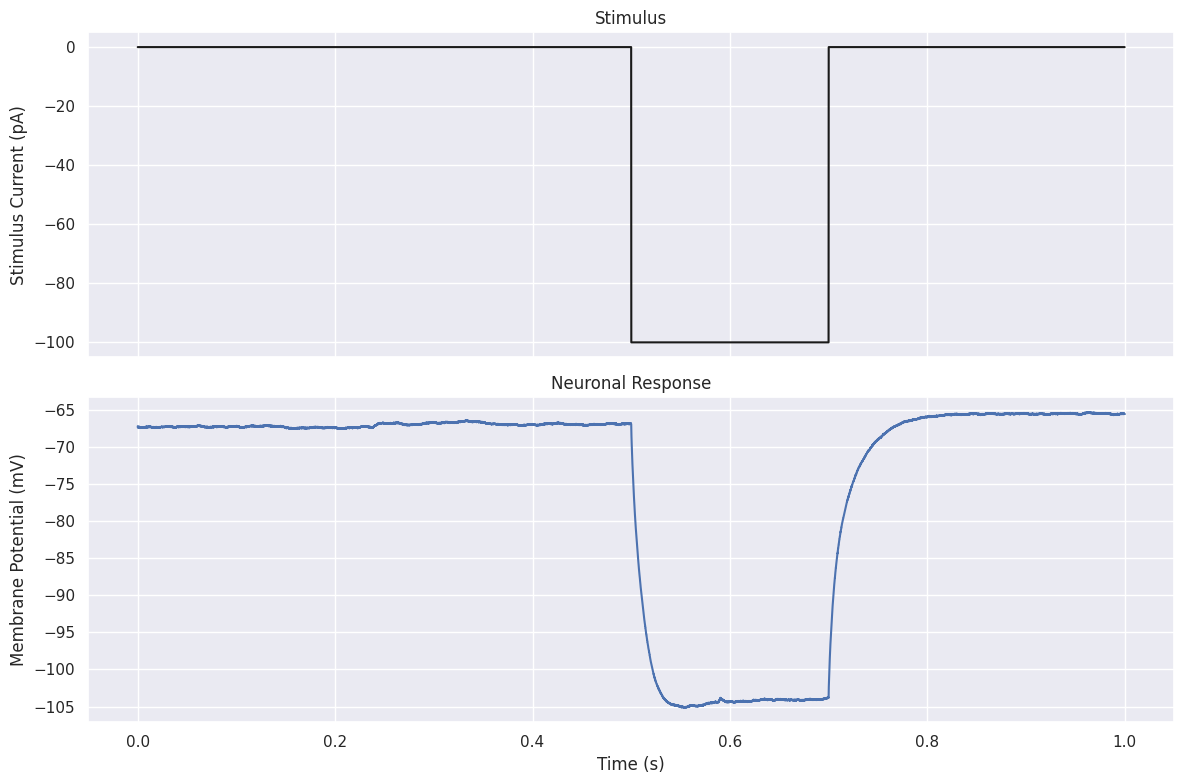

In [13]:
# Load a subset of the data (to avoid downloading too much data)
# Taking 1 second of data at 20 kHz = 20,000 samples
sample_size = 20000  # 1 second of data
response_data = response.data[:sample_size] * response.conversion  # Convert to volts
stimulus_data = stimulus.data[:sample_size] * stimulus.conversion  # Convert to amperes (A)

# Create time array
time = np.arange(sample_size) / response.rate  # Time in seconds

# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot stimulus
ax1.plot(time, stimulus_data * 1e12, 'k')  # Convert to pA for better visualization
ax1.set_ylabel('Stimulus Current (pA)')
ax1.set_title('Stimulus')
ax1.grid(True)

# Plot response
ax2.plot(time, response_data * 1e3, 'b')  # Convert to mV for better visualization
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Membrane Potential (mV)')
ax2.set_title('Neuronal Response')
ax2.grid(True)

plt.tight_layout()
plt.show()

## 8. Comparing multiple responses

Now let's compare the responses from several different trials to see if there are consistent patterns in the neuron's behavior.

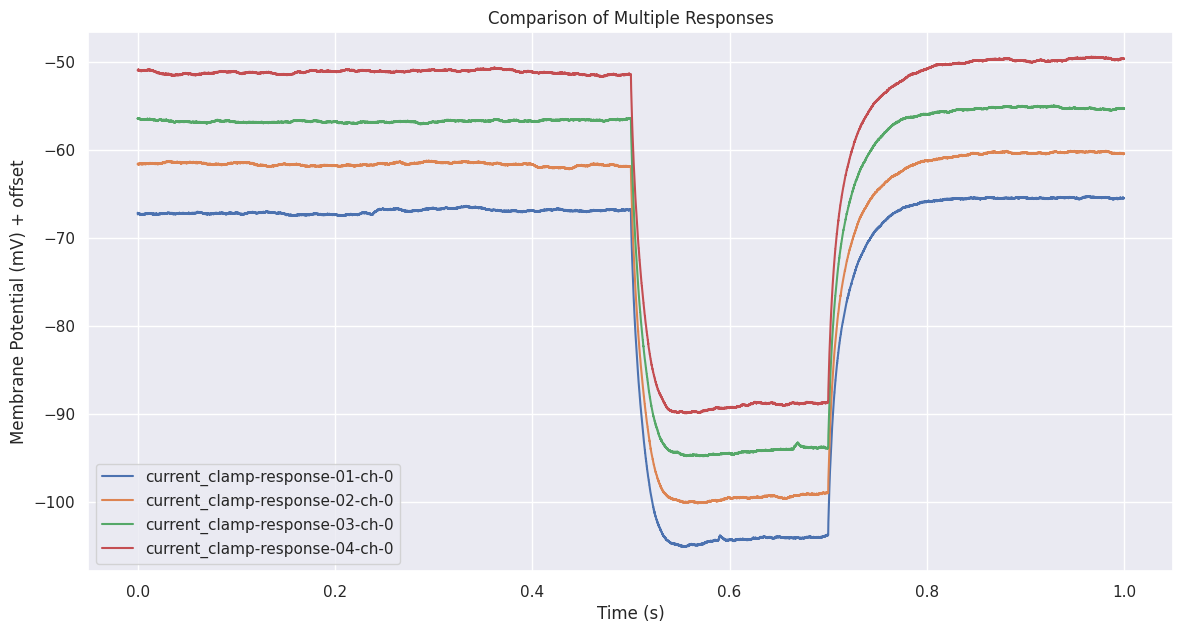

In [14]:
# Select multiple responses to compare
response_keys = [f"current_clamp-response-{i:02d}-ch-0" for i in range(1, 5)]
responses = [acquisition[key] for key in response_keys]

plt.figure(figsize=(14, 7))

# Plot each response
for i, (response, key) in enumerate(zip(responses, response_keys)):
    # Load a subset of data
    response_data = response.data[:sample_size] * response.conversion * 1e3  # Convert to mV
    time = np.arange(sample_size) / response.rate
    
    # Plot with slight offset for visibility
    plt.plot(time, response_data + (i * 5), label=key)

plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (mV) + offset')
plt.title('Comparison of Multiple Responses')
plt.legend()
plt.grid(True)
plt.show()

## 9. Exploring stimulus-response relationships

Let's look at how stimulus characteristics affect the response. We'll examine multiple stimulus-response pairs.

Summary statistics for responses:


,response_mean,response_std,response_min,response_max,response_range,stimulus_amplitude,pair_id
0,-74.325360,14.633361,-105.133059,-65.246583,39.886476,100.0,1
1,-74.204564,14.806988,-105.194094,-65.093996,40.100099,100.0,2
2,-74.113370,14.691067,-104.827883,-64.941408,39.886476,100.0,3
3,-73.735785,14.857847,-104.949954,-64.392091,40.557862,100.0,4
4,-74.240140,14.735059,-105.072024,-64.819337,40.252686,100.0,5
5,-74.068463,14.724568,-104.858401,-65.093996,39.764405,100.0,6
6,-74.056420,14.696488,-104.888918,-64.575197,40.313722,100.0,7
7,-73.970020,14.796494,-104.858401,-64.056398,40.802003,100.0,8
8,-74.073007,14.684677,-104.888918,-64.605714,40.283204,100.0,9
9,-74.193649,14.816523,-104.980471,-64.697267,40.283204,100.0,10


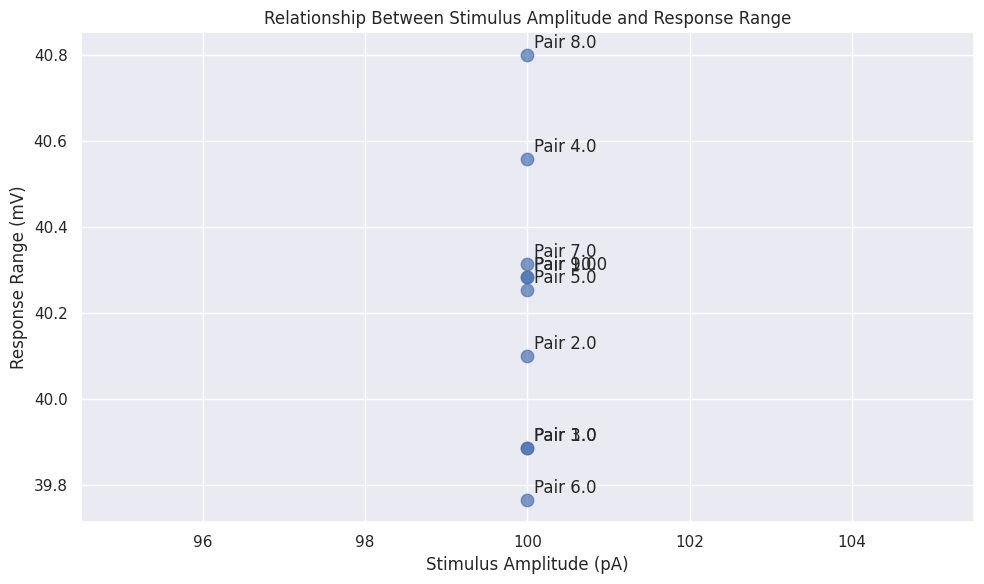

In [15]:
# Function to calculate descriptive statistics for a response
def analyze_response(response_data, stimulus_data):
    """Calculate descriptive statistics for a response relative to the stimulus"""
    response_mean = np.mean(response_data)
    response_std = np.std(response_data)
    response_min = np.min(response_data)
    response_max = np.max(response_data)
    
    # Simple calculation of stimulus strength (max - min)
    stimulus_amplitude = np.max(stimulus_data) - np.min(stimulus_data)
    
    return {
        'response_mean': response_mean,
        'response_std': response_std,
        'response_min': response_min,
        'response_max': response_max,
        'response_range': response_max - response_min,
        'stimulus_amplitude': stimulus_amplitude
    }

# Analyze multiple stimulus-response pairs
num_pairs = 10  # Look at 10 stimulus-response pairs
results = []

for i in range(1, num_pairs + 1):
    response_key = f"current_clamp-response-{i:02d}-ch-0"
    stimulus_key = f"stimulus-{i:02d}-ch-0"
    
    if response_key in acquisition and stimulus_key in nwb.stimulus:
        response_obj = acquisition[response_key]
        stimulus_obj = nwb.stimulus[stimulus_key]
        
        # Load a subset of the data
        response_data = response_obj.data[:sample_size] * response_obj.conversion * 1e3  # to mV
        stimulus_data = stimulus_obj.data[:sample_size] * stimulus_obj.conversion * 1e12  # to pA
        
        # Analyze the response
        stats = analyze_response(response_data, stimulus_data)
        stats['pair_id'] = i
        results.append(stats)

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame(results)
print("Summary statistics for responses:")
display(results_df)

# Plot stimulus amplitude vs response range
plt.figure(figsize=(10, 6))
plt.scatter(results_df['stimulus_amplitude'], results_df['response_range'], 
            s=80, alpha=0.7)
plt.xlabel('Stimulus Amplitude (pA)')
plt.ylabel('Response Range (mV)')
plt.title('Relationship Between Stimulus Amplitude and Response Range')
plt.grid(True)

# Add pair IDs as annotations
for i, row in results_df.iterrows():
    plt.annotate(f"Pair {row['pair_id']}", 
                (row['stimulus_amplitude'], row['response_range']),
                xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

## 10. Deeper analysis of a single response

Let's do a more detailed analysis of a single response, looking at features such as:
- Membrane potential changes
- Any evidence of action potentials
- Response characteristics

ValueError: x and y must have same first dimension, but have shapes (200000,) and (100000,)

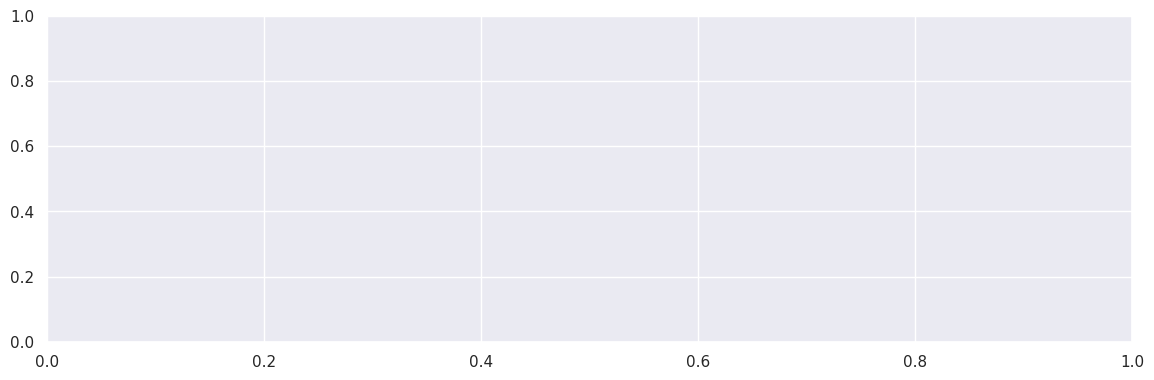

In [16]:
# Select a specific response for detailed analysis
response_key = "current_clamp-response-03-ch-0"
stimulus_key = "stimulus-03-ch-0"

response = acquisition[response_key]
stimulus = nwb.stimulus[stimulus_key]

# Load more data for this analysis (10 seconds)
sample_size = int(10 * response.rate)  # 10 seconds of data
response_data = response.data[:sample_size] * response.conversion * 1e3  # to mV
stimulus_data = stimulus.data[:sample_size] * stimulus.conversion * 1e12  # to pA
time = np.arange(sample_size) / response.rate  # Time in seconds

# Create a figure with multiple subplots
fig = plt.figure(figsize=(14, 12))
gs = fig.add_gridspec(3, 1, height_ratios=[2, 2, 1])

# Plot full response
ax1 = fig.add_subplot(gs[0])
ax1.plot(time, response_data, 'b', linewidth=1)
ax1.set_title(f'Detailed Analysis of {response_key}')
ax1.set_ylabel('Membrane Potential (mV)')
ax1.grid(True)

# Plot stimulus
ax2 = fig.add_subplot(gs[1])
ax2.plot(time, stimulus_data, 'k', linewidth=1)
ax2.set_ylabel('Stimulus Current (pA)')
ax2.grid(True)

# Plot a histogram of the membrane potential
ax3 = fig.add_subplot(gs[2])
ax3.hist(response_data, bins=50, alpha=0.7, color='blue')
ax3.set_xlabel('Membrane Potential (mV)')
ax3.set_ylabel('Count')
ax3.grid(True)

plt.tight_layout()
plt.show()

# Calculate basic statistics
print("Response Statistics:")
print(f"Mean membrane potential: {np.mean(response_data):.2f} mV")
print(f"Standard deviation: {np.std(response_data):.2f} mV")
print(f"Minimum value: {np.min(response_data):.2f} mV")
print(f"Maximum value: {np.max(response_data):.2f} mV")
print(f"Range: {np.max(response_data) - np.min(response_data):.2f} mV")

## 11. Comparing responses across different time periods

Let's look at how the responses evolve across different time periods by comparing responses from early and later trials.

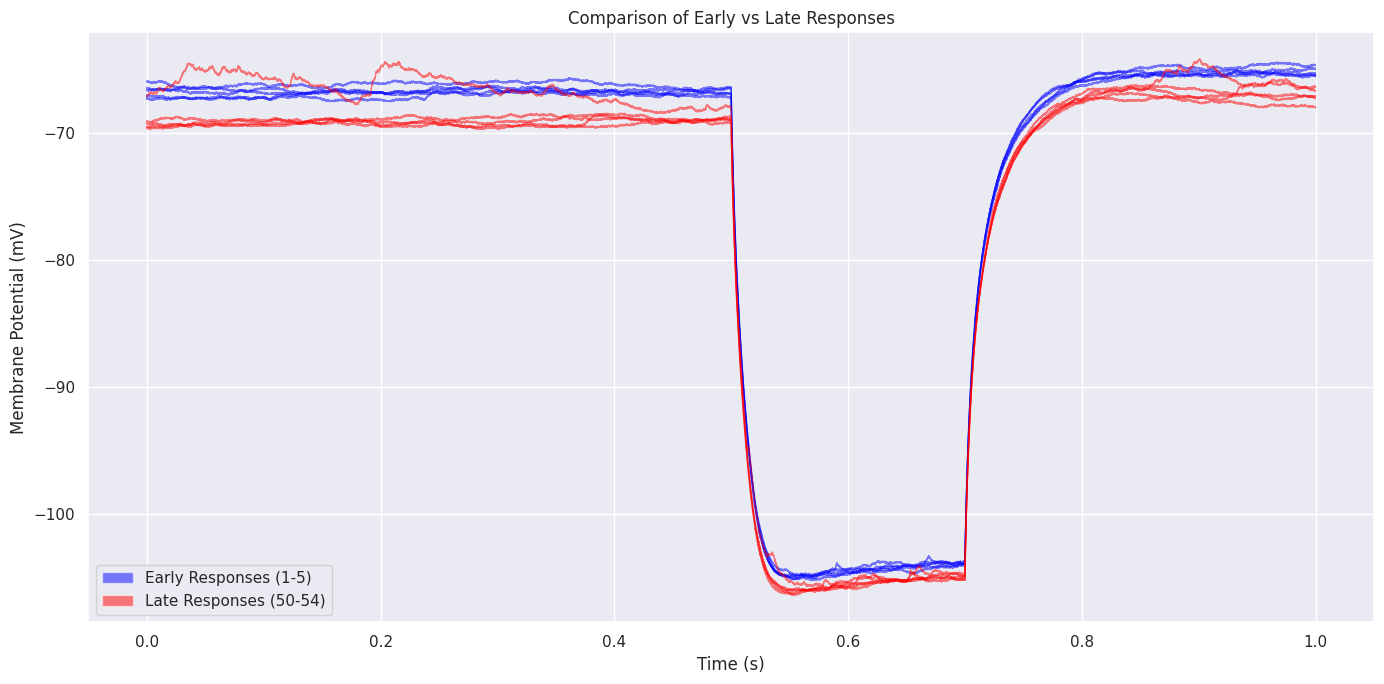

In [17]:
# Compare early and late responses
early_responses = [f"current_clamp-response-{i:02d}-ch-0" for i in range(1, 6)]  # First 5
late_responses = [f"current_clamp-response-{i:02d}-ch-0" for i in range(50, 55)]  # 50-54

# Function to plot a set of responses
def plot_response_set(response_keys, title, color):
    for key in response_keys:
        if key in acquisition:
            response = acquisition[key]
            # Get just a short sample for visualization
            data = response.data[:20000] * response.conversion * 1e3  # to mV
            time = np.arange(len(data)) / response.rate
            plt.plot(time, data, color=color, alpha=0.5, linewidth=1)
    
# Create plot
plt.figure(figsize=(14, 7))

# Plot early responses
plot_response_set(early_responses, "Early Responses", "blue")

# Plot late responses
plot_response_set(late_responses, "Late Responses", "red")

plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Comparison of Early vs Late Responses')
plt.grid(True)

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', alpha=0.5, label='Early Responses (1-5)'),
    Patch(facecolor='red', alpha=0.5, label='Late Responses (50-54)')
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

## 12. Advanced analysis: Exploring response characteristics to different stimuli

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


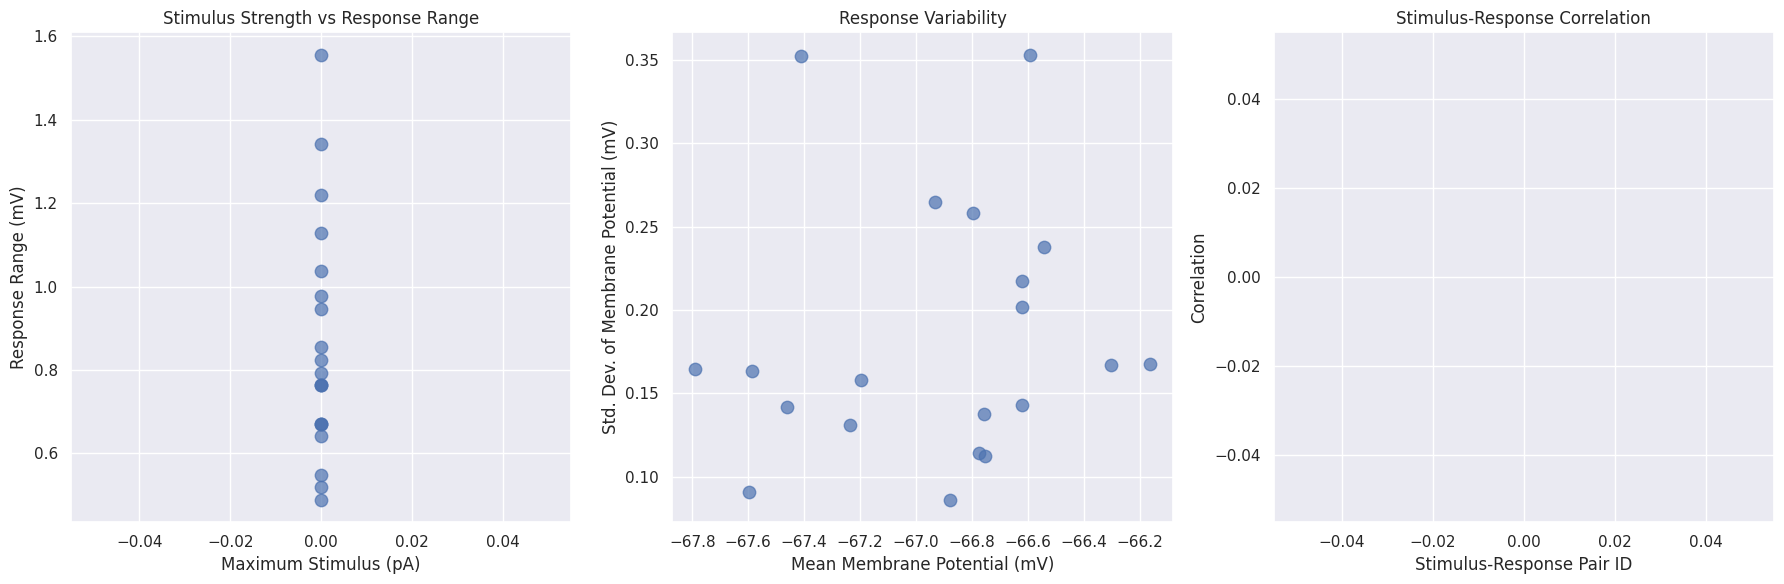

In [18]:
# Let's explore how the cell responds to different stimulus types
# We'll extract features from multiple responses

# Function to extract key features from a response
def extract_features(response_data, stimulus_data, time):
    """Extract key features from the response and stimulus data"""
    # Response features
    response_mean = np.mean(response_data)
    response_std = np.std(response_data)
    response_range = np.max(response_data) - np.min(response_data)
    
    # Stimulus features
    stimulus_mean = np.mean(stimulus_data)
    stimulus_max = np.max(stimulus_data)
    
    # Relationship between stimulus and response
    # (very simple measure - correlation between stimulus and response)
    correlation = np.corrcoef(stimulus_data, response_data)[0, 1]
    
    return {
        'response_mean': response_mean,
        'response_std': response_std,
        'response_range': response_range,
        'stimulus_mean': stimulus_mean,
        'stimulus_max': stimulus_max,
        'correlation': correlation
    }

# Extract features from multiple stimulus-response pairs
num_to_analyze = 20
features = []

for i in range(1, num_to_analyze + 1):
    response_key = f"current_clamp-response-{i:02d}-ch-0"
    stimulus_key = f"stimulus-{i:02d}-ch-0"
    
    if response_key in acquisition and stimulus_key in nwb.stimulus:
        response_obj = acquisition[response_key]
        stimulus_obj = nwb.stimulus[stimulus_key]
        
        # Load data (just first 5000 samples for quick analysis)
        sample_size = 5000
        response_data = response_obj.data[:sample_size] * response_obj.conversion * 1e3  # to mV
        stimulus_data = stimulus_obj.data[:sample_size] * stimulus_obj.conversion * 1e12  # to pA
        time = np.arange(sample_size) / response_obj.rate
        
        # Extract features
        feature_set = extract_features(response_data, stimulus_data, time)
        feature_set['pair_id'] = i
        features.append(feature_set)

# Convert to DataFrame
features_df = pd.DataFrame(features)

# Plot feature relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Stimulus max vs response range
axes[0].scatter(features_df['stimulus_max'], features_df['response_range'], 
              alpha=0.7, s=80)
axes[0].set_xlabel('Maximum Stimulus (pA)')
axes[0].set_ylabel('Response Range (mV)')
axes[0].set_title('Stimulus Strength vs Response Range')
axes[0].grid(True)

# Plot 2: Response mean vs response std
axes[1].scatter(features_df['response_mean'], features_df['response_std'],
              alpha=0.7, s=80)
axes[1].set_xlabel('Mean Membrane Potential (mV)')
axes[1].set_ylabel('Std. Dev. of Membrane Potential (mV)')
axes[1].set_title('Response Variability')
axes[1].grid(True)

# Plot 3: Correlation between stimulus and response
axes[2].bar(features_df['pair_id'], features_df['correlation'], alpha=0.7)
axes[2].set_xlabel('Stimulus-Response Pair ID')
axes[2].set_ylabel('Correlation')
axes[2].set_title('Stimulus-Response Correlation')
axes[2].grid(True)

plt.tight_layout()
plt.show()

## 13. Response to PAGER activation

The Dandiset contains recordings of neuronal responses to activation of programmable antigen-gated G-protein-coupled engineered receptors (PAGERs). Let's explore how these neurons respond to PAGER activation.

NWB file metadata indicates neurons were transfected with AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were recorded in response to:
- DCZ (100 nM)
- DCZ + soluble mCherry (1 uM)

ValueError: x and y must have same first dimension, but have shapes (600000,) and (100000,)

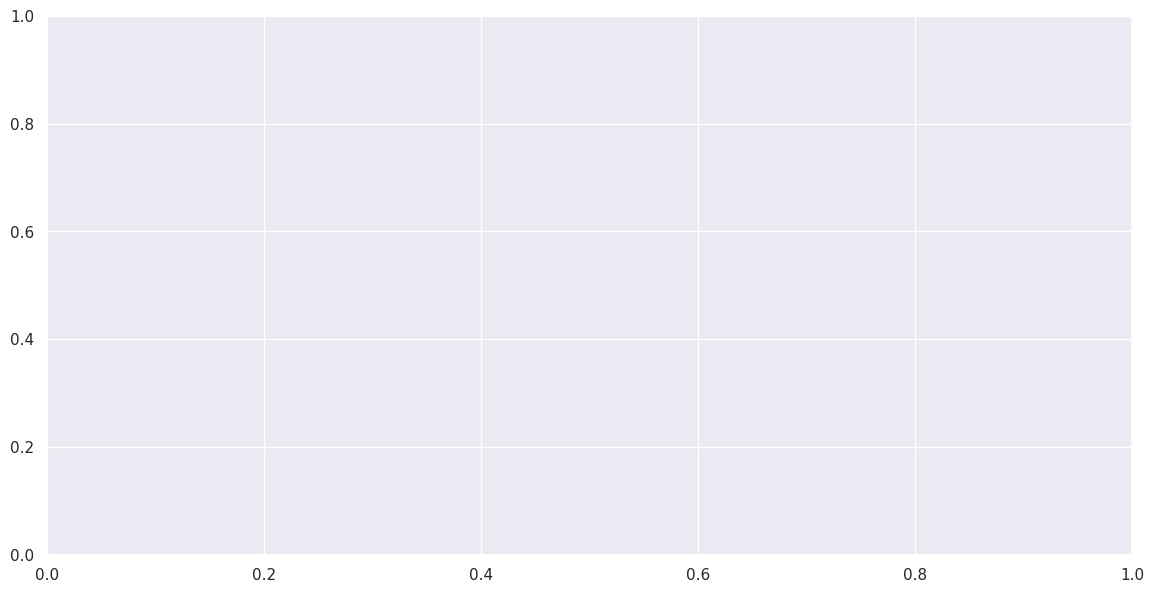

In [19]:
# Let's look at a longer recording segment to identify potential responses to PAGER activation
# We'll examine a segment from a later recording which might show PAGER effects
response_key = "current_clamp-response-100-ch-0"

if response_key in acquisition:
    response = acquisition[response_key]
    # Get a 30-second segment
    sample_size = int(30 * response.rate)
    response_data = response.data[:sample_size] * response.conversion * 1e3  # to mV
    time = np.arange(sample_size) / response.rate
    
    plt.figure(figsize=(14, 7))
    plt.plot(time, response_data, linewidth=1)
    plt.xlabel('Time (s)')
    plt.ylabel('Membrane Potential (mV)')
    plt.title(f'Extended Recording Segment ({response_key})')
    plt.grid(True)
    plt.show()
    
    # Calculate baseline characteristics
    baseline_mean = np.mean(response_data[:int(response.rate)])  # First second
    later_mean = np.mean(response_data[-int(response.rate):])  # Last second
    
    print(f"Baseline membrane potential (first 1s): {baseline_mean:.2f} mV")
    print(f"Later membrane potential (last 1s): {later_mean:.2f} mV")
    print(f"Change: {later_mean - baseline_mean:.2f} mV")
else:
    print(f"Response key {response_key} not found in acquisition data")

## Summary and Future Directions

In this notebook, we explored intracellular electrophysiological recordings from mouse hippocampal CA1 neurons in Dandiset 001354. These recordings show neuronal responses to activation of programmable antigen-gated G-protein-coupled engineered receptors (PAGERs).

### Key findings:

1. We successfully accessed and loaded data from the DANDI archive
2. We explored the structure of NWB files containing intracellular recordings
3. We visualized and analyzed stimulus-response relationships
4. We compared responses across different time periods
5. We extracted features that characterize neuronal responses

### Potential future directions:

1. **Comprehensive response analysis**: Analyze all recordings to characterize the full range of neuronal responses
2. **Effect of DCZ and mCherry**: Compare responses before and after application of DCZ or DCZ+mCherry
3. **Action potential detection**: Implement spike detection algorithms to identify and characterize action potentials
4. **Comparison across subjects**: Compare recordings from different subjects to identify consistent patterns
5. **Pharmacological response profiles**: Analyze how neuronal responses change over time after drug application
6. **Statistical characterization**: Apply statistical methods to quantify changes in membrane potential, input resistance, and firing patterns

### References:

- [DANDI Archive](https://dandiarchive.org/)
- [NWB Format](https://www.nwb.org/)
- [Neurodata Without Borders: Neurophysiology (NWB:N) 2.0](https://doi.org/10.1101/523035)
- Original study linked to this Dandiset: [https://doi.org/10.1038/s41586-024-08282-3](https://doi.org/10.1038/s41586-024-08282-3)